# REGRESSIONE LINEARE

In [1]:
#importo librerie
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')

In [3]:
#mi appoggio ad un secondo file con le funzioni
%run funzioni_reg_clu.ipynb
test_util()

Import complete ☼


In [4]:
#importo dataset
x = pd.read_csv('italy_total.csv', index_col=[0])
x_reg = pd.read_csv('italy_region.csv',sep=",")
x_pro = pd.read_csv('italy_province.csv',  index_col=[0])
chita = pd.read_csv('chita.csv',sep=';')

In [5]:
#tolgo i dati cinesi 
x_ita=chita.copy()
x_ita=x_ita.drop(x_ita[x_ita.Stato != 'Italia'].index)
x_ita.reset_index(drop=True, inplace=True)
x_ita=x_ita.rename(columns={"PIL(MLD)":"PIL"})

In [6]:
#attraverso la funzione getNewCases, ottendo il numero di nuuovi casi giornalieri
x['new_cases']=getNewDailyCases(x)

In [7]:
# REGRESSIONE LINEARE

In [8]:
## LIVELLO NAZIONALE  ##

In [9]:
#### TOTALE OSPEDALIZZATII E TERMAPIA INTENSAIVA ####

In [10]:
#prendo i valori degli ospedalizzati e delle terapie intensive
x_nnc = x.loc[:,'total_hospitalized' ]
x_nnc = pd.DataFrame(x_nnc)
y_nnc = x.loc[:,'intensive_care' ]
y_nnc = pd.DataFrame(y_nnc)

In [11]:
#separo i dati per i train e per i test con rapporto 70/30
x_train_nnc, x_test_nnc, y_train_nnc, y_test_nnc  = train_test_split(x_nnc , y_nnc , test_size= 0.3, random_state = 7)

In [12]:
#costruisco i modelli e lo score
model_nnc = model_fit(x_train_nnc , y_train_nnc )
score_nnc = model_nnc.score(x_train_nnc , y_train_nnc )

In [13]:
#### TOTALE TEST E CASI COMULATIVI ####

In [14]:
#i passi sono identici a prima

In [15]:
x_ttc = x.loc[:, 'total_tests']
x_ttc = pd.DataFrame(x_ttc)
y_ttc = x.loc[:, 'cumulative_cases']
y_ttc = pd.DataFrame(y_ttc)

In [16]:
x_train_ttc, x_test_ttc, y_train_ttc, y_test_ttc = train_test_split(x_ttc, y_ttc, test_size= 0.3, random_state = 6)
model_ttc = model_fit(x_train_ttc, y_train_ttc)
score_ttc = model_ttc.score(x_train_ttc, y_train_ttc)

In [17]:
#### TOTALE TEST E CASI COMULATIVI ####

In [18]:
x_cd = x.loc[:,'death' ]
x_cd = pd.DataFrame(x_ttc)
y_cd = x.loc[:,'recovered' ]
y_cd = pd.DataFrame(y_cd)

In [19]:
x_train_cd, x_test_cd, y_train_cd, y_test_cd = train_test_split(x_cd, y_cd, test_size= 0.3, random_state = 7)
model_cd = model_fit(x_train_cd, y_train_cd)
score_cd = model_cd.score(x_train_cd, y_train_cd)

In [20]:
#OUTPUT

Italia: totali ospedalizzati - terapia intensiva R2: 0.896802054606201
Intercept(s):  [-95.91915771]
Italia: test totali - totale dei casi R2: 0.8843401150565545
Intercept(s):  [31490.72979663]
Italia: morti - guariti R2: 0.9939219659379696
Intercept(s):  [-3566.48721678]


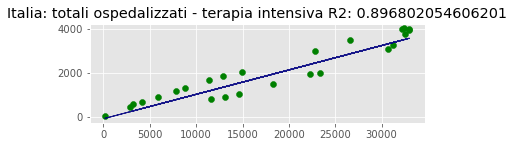

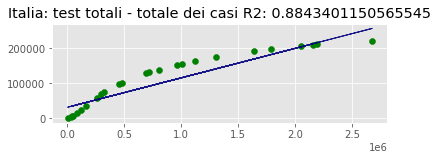

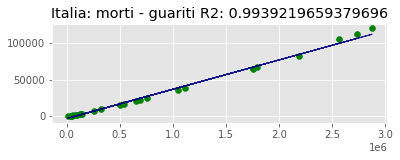

In [21]:
drawLine(model_nnc , x_test_nnc, y_test_nnc, "Italia: totali ospedalizzati - terapia intensiva", score_nnc)
drawLine(model_ttc, x_test_ttc, y_test_ttc, "Italia: test totali - totale dei casi", score_ttc)
drawLine(model_cd, x_test_cd, y_test_cd, "Italia: morti - guariti", score_cd)

In questi 3 grafici sono riportate le analisi du regressione su 3 aspetti diversi. 


 -> Modello  totale ospedalizzati - terapia intnsiva : viene evidenziata la relazione tra gli ospedalizzati e coloro che sono in terapia intensiva. La variabile indipendente è il totale dei pazienti in ospedale, mentre quella dipendente è rappresentata dalle persone che si trovano in terapia intesiva. I valori di discostano leggermente dalla retta nella parte centrale. Il valore di R^2 suggerisce il rischio di overfitting, in quanto i valori si avvicinano all valore massimo 1.
 -> Modello test totali- casi comulativi : viene analizzata la trelazione tra i test effettuati e i casi positivi riscontrati. La variabile indipendente riguarda i test, mentre la dipendente raccoglie i casi positivi. Anche in questo caso R^2 è elevato e ciò implica che il modello predica i maniera veritiera l'andamento.
 -> Modello morti - guariti : analizza l'andamento tra i morti e i guariti

In [22]:
####  REGRESSIONE LINEARE REGIONI ####

In [23]:
lom=x_reg.copy()
lom = lom[lom['region_name'] == "Lombardia"]

In [24]:
x_lom = lom.loc[:,'total_tests' ]
x_lom = pd.DataFrame(x_lom)
y_lom = lom.loc[:,'cumulative_cases' ]
y_lom = pd.DataFrame(y_lom)

In [25]:
x_train_lom, x_test_lom, y_train_lom, y_test_lom = train_test_split(x_lom, y_lom, test_size= 0.3, random_state = 7)
modellom = model_fit(x_train_lom, y_train_lom)
scorelom = modellom.score(x_train_lom, y_train_lom)

In [26]:
cam=x_reg.copy()
cam = cam[cam['region_name'] == "Campania"]

In [27]:
x_cam = cam.loc[:,'total_tests' ]
x_cam = pd.DataFrame(x_cam)
y_cam = cam.loc[:,'cumulative_cases' ]
y_cam = pd.DataFrame(y_cam)

In [28]:
x_train_cam, x_test_cam, y_train_cam, y_test_cam = train_test_split(x_cam, y_cam, test_size= 0.3, random_state = 7)
modelcam = model_fit(x_train_cam, y_train_cam)
scorecam = modelcam.score(x_train_cam, y_train_cam)

In [29]:
ao = x_reg.copy()
ao = ao[ao['region_name'] == "Valle d'Aosta"]

In [30]:
x_ao = ao.loc[:,'total_tests' ]
x_ao = pd.DataFrame(x_ao)
y_ao = ao.loc[:,'cumulative_cases' ]
y_ao = pd.DataFrame(y_ao)

In [31]:
x_train_ao, x_test_ao, y_train_ao, y_test_ao = train_test_split(x_ao, y_ao, test_size= 0.3, random_state = 7)
modelao = model_fit(x_train_ao, y_train_ao)
scoreao = modelao.score(x_train_ao, y_train_ao)

Lombardia: test totali - casi totali R2: 0.8821474391543177
Intercept(s):  [12619.94880603]
Campania: test totali - casi totali R2: 0.7770505104701975
Intercept(s):  [960.71283024]
Valle d'Aosta: test totali - casi totali R2: 0.7893707694468375
Intercept(s):  [234.07581007]


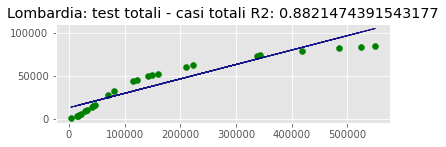

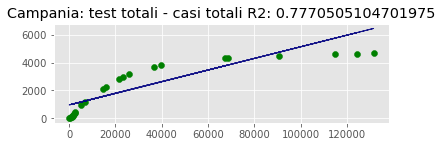

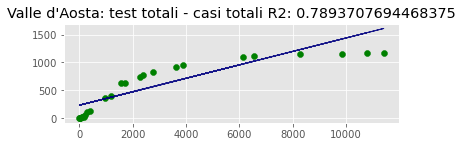

In [32]:
drawLine(modellom, x_test_lom, y_test_lom, "Lombardia: test totali - casi totali", scorelom)
drawLine(modelcam, x_test_cam, y_test_cam, "Campania: test totali - casi totali", scorecam)
drawLine(modelao, x_test_ao, y_test_ao, "Valle d'Aosta: test totali - casi totali", scoreao)

I grafici riportano l'andamento dei casi totali con i test effetauti prendendo un campione per le zone a basso, medio e altro contagio.

La Lombardia mostra un rapporto con un risultato molto alto. Il discostamento dei valori presi in esame è minore rispetto alle altre due regioni. Irischio di overfitting è molto alto.

Simili tra di loro ci sono Campania e Valle d'Aosta. Entrambe hanno un R^2 abbastanza alto e hanno un andamento simile: il discostamento dalla retta è più alto negli emisferi.

In [33]:
#### LIVELLO PROVINCIALE ####

In [34]:
mil=x_pro.copy()
mil = mil[mil['province_name'] == "Milano"]
x_mil = mil.loc[:,'total_cases' ]
x_mil = pd.DataFrame(x_mil)
y_mil = mil.loc[:,'new_cases' ]
y_mil = pd.DataFrame(y_mil)
x_train_mil, x_test_mil, y_train_mil, y_test_mil = train_test_split(x_mil, y_mil, test_size= 0.3, random_state = 7)
modelmil = model_fit(x_train_mil, y_train_mil)
scoremil = modelmil.score(x_train_mil, y_train_mil)

In [35]:
ber=x_pro.copy()
ber = ber[ber['province_name'] == "Bergamo"]
x_ber = ber.loc[:,'total_cases' ]
x_ber = pd.DataFrame(x_ber)
y_ber = ber.loc[:,'new_cases' ]
y_ber = pd.DataFrame(y_ber)
x_train_ber, x_test_ber, y_train_ber, y_test_ber = train_test_split(x_ber, y_ber, test_size= 0.3, random_state = 7)
modelber = model_fit(x_train_ber, y_train_ber)
scoreber = modelber.score(x_train_ber, y_train_ber)

In [36]:
bre=x_pro.copy()
bre = bre[bre['province_name'] == "Brescia"]
x_bre= bre.loc[:,'total_cases' ]
x_bre = pd.DataFrame(x_bre)
y_bre = ber.loc[:,'new_cases' ]
y_bre = pd.DataFrame(y_bre)
x_train_bre, x_test_bre, y_train_bre, y_test_bre = train_test_split(x_bre, y_bre, test_size= 0.3, random_state = 7)
modelbre = model_fit(x_train_bre, y_train_bre)
scorebre = modelbre.score(x_train_bre, y_train_bre)

In [37]:
lo=x_pro.copy()
lo = lo[lo['province_name'] == "Lodi"]
x_lo= lo.loc[:,'total_cases' ]
x_lo = pd.DataFrame(x_lo)
y_lo = lo.loc[:,'new_cases' ]
y_lo = pd.DataFrame(y_lo)
x_train_lo, x_test_lo, y_train_lo, y_test_lo = train_test_split(x_lo, y_lo, test_size= 0.3, random_state = 7)
modello = model_fit(x_train_lo, y_train_lo)
scorelo = modello.score(x_train_lo, y_train_lo)

Milano: casi totali - nuovi R2: 0.014993441918863093
Intercept(s):  [244.72824763]
Bergamo: casi totali - nuovi R2: 0.03154336859787865
Intercept(s):  [193.86002811]
Brescia: casi totali - nuovi R2: 0.0644214541986945
Intercept(s):  [209.83256015]
Lodi: casi totali - nuovi R2: 0.25380637103499193
Intercept(s):  [76.84191183]


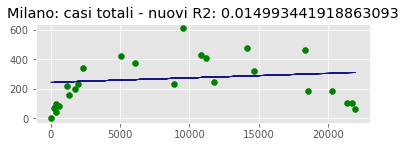

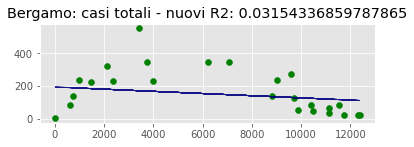

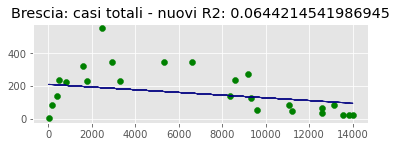

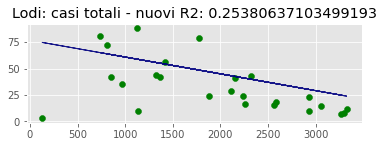

In [38]:
drawLine(modelmil, x_test_mil, y_test_mil, "Milano: casi totali - nuovi", scoremil)
drawLine(modelber, x_test_ber, y_test_ber, "Bergamo: casi totali - nuovi", scoreber)
drawLine(modelbre, x_test_bre, y_test_bre, "Brescia: casi totali - nuovi", scorebre)
drawLine(modello, x_test_lo, y_test_lo, "Lodi: casi totali - nuovi", scorelo)

I grafici riportano l'andamento delle provincie lombarde più colpite (Milano, Bergamo, Brescia e Lodi). Milano presenta una retta crescente e dei valori che in alcuni casi si discostano molto. Il suo R^2 è molto basso, segno di una previsione non veritera.
Adifferenza del capoluogo della regione, Lodi, Brescia e Bergamo, presentano una retta decrescente. I dati si discostano dalla retta, comportando ciò un valore di R^2 basso e un'analisi non troppo veritiera rispetto alla realtà.

In [39]:
###################### CLUSTERING #######################################

In [40]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn import preprocessing


In [41]:
def doKMeans_PILDen(df):
    #creo il grafico
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    #aggiungo i dati
    ax.scatter(df.PIL, df.Densita, marker='.', c='black', alpha=0.3, s=130)
    
    df = df.loc[:, ['PIL', 'Densita']]
    
    #setto il numero di cluster
    model = KMeans(n_clusters=6)
    model.fit(df)
    #creo il modello
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
    
    #stampo i cluster
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='red', alpha=0.5, linewidths=3, s=169)


In [42]:
#prelevo la lista delle regioni dal loro codice
region_code=x_reg.loc[:, 'region_code']

[[ 19.13666667  68.76      ]
 [157.945      382.235     ]
 [ 66.71333333 227.99666667]
 [400.64       422.61      ]
 [158.5825     199.9725    ]
 [ 32.8125     140.74      ]]


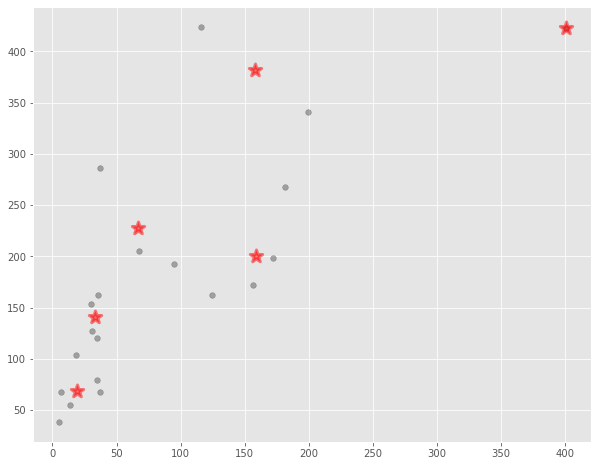

In [43]:
df=x_ita
doKMeans_PILDen(df)

Il grafico rappresenta la distribuzione delle regioni in base aalla loro densità e al loro PIL. In alto ci sono, partendo da sinistra la Campania (PIL medio - densità alta) e la Lombardia (PIL alto - densità alta).
Scendendo verso il basso troviamo le altre regioni e si può intuire anche a quale cluster appartengono

In [44]:
#trasformo valori float in int
x_ita['PIL']=x_ita['PIL'].apply(np.int64)
x_ita['Densita']=x_ita['Densita'].apply(np.int64)

In [45]:
#prendo i valori dell'ultimo giorno 
last_day=x_reg.tail(21)
df3=pd.DataFrame(last_day)

In [46]:
def doKMeans_TotC_Pos(df2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.scatter(df2.cumulative_positive_cases, df2.cumulative_cases, marker='.', c='red', alpha=0.3, s=150)

    df2 = df2.loc[:, ['cumulative_positive_cases', 'cumulative_cases']]

    model = KMeans(n_clusters=3)
    model.fit(df2)
    KMeans(copy_x=True, init='k-means++', max_iter=400, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, 
    verbose=1)

    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='o', c='blue', alpha=0.5, linewidths=3, s=169)


[[ 1339.47058824  3789.47058824]
 [27746.         84119.        ]
 [ 7184.33333333 25115.        ]]


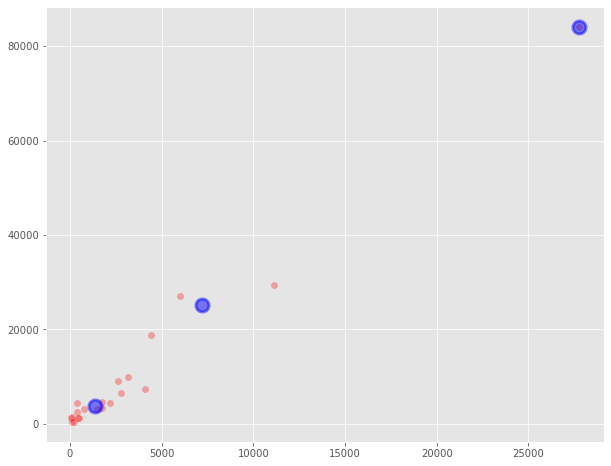

In [47]:
doKMeans_TotC_Pos(df3)

Il grafico rappresenta la distribuzione delle regioni in base alla loro valore di contagi (basso - medio - alto). Spunta all'occhio come la situazione in molte regione è statmolto contenuta. Infatti si sono posizionate vicino alprimo cluster. Solo 3 regioni hanno subito un contagio medio e una sola un contagio alto (coparta dal pallino del cluster).

In [48]:
totprolom = x_pro.copy()
#prendo le province lombarde
provlom = totprolom[totprolom['region_name'] == "Lombardia"]
#prendo i valori dell'ultima giornata
provlom=provlom.tail(13)
#tolgo quelli in fase di aggiornamento
provlom = provlom[:-1]
#creo il dataset
dflom=pd.DataFrame(provlom)

In [49]:
def doKMeans_newPosCas(df2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)

    ax.scatter(df2.total_cases,df2.new_cases, marker='o', c='red', alpha=0.3,s=130)
    
    df2 = df2.loc[:, ['total_cases', 'new_cases']]

    model = KMeans(n_clusters=3)
    model.fit(df2)
    KMeans(copy_x=True, init='k-means++', max_iter=400, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, 
    verbose=1)
    
    centroids = model.cluster_centers_
    print(centroids)
  
    ax.scatter(centroids[:,0], centroids[:,1], marker='o', c='blue', alpha=0.5, linewidths=3, s=169)

[[3.77211111e+03 1.56666667e+01]
 [1.31895000e+04 4.20000000e+01]
 [2.19660000e+04 6.60000000e+01]]


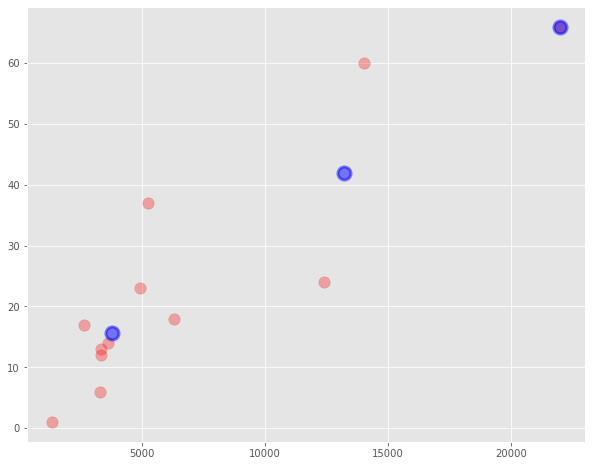

In [50]:
doKMeans_newPosCas(dflom)

Il grafico mostra come sono distribuite le regioni in base alla quantità di nuovi infetti registarti. Anche in questo caso c'è la  formazione di 3 cluster principali (basso - medio - alto) e la maggior parte delle regioni si posiziona intorno al cluster di livello basso.